**THEORY**

1. What is unsupervised learning?

Unsupervised learning is a type of machine learning where the model learns patterns from data without labeled outputs. The algorithm tries to discover hidden structures such as clusters, relationships, or distributions in the data.

2. How does K-Means clustering work?

K-Means works by selecting K initial centroids, assigning each data point to the nearest centroid, recalculating centroids based on assigned points, and repeating this process until centroids no longer change significantly.

3. Concept of a dendrogram

A dendrogram is a tree-like diagram used in hierarchical clustering to show how data points are merged step-by-step. The height at which two clusters merge represents the distance between them.

4. Difference between K-Means and Hierarchical Clustering

K-Means requires the number of clusters beforehand and works iteratively, while hierarchical clustering does not require a predefined number of clusters and builds a hierarchy of clusters.

5. Advantages of DBSCAN over K-Means

DBSCAN can detect clusters of arbitrary shape, identify noise points, and does not require the number of clusters in advance.

6. When is Silhouette Score used?

Silhouette Score is used to evaluate how well data points fit within their assigned clusters compared to other clusters.

7. Limitations of Hierarchical Clustering

It is computationally expensive, not suitable for very large datasets, and once clusters are merged or split, the decision cannot be undone.

8. Importance of feature scaling in K-Means

K-Means relies on distance calculations, so features with larger scales can dominate clustering results if data is not scaled.

9. How DBSCAN identifies noise

DBSCAN labels points as noise if they do not have enough neighboring points within a specified radius (eps).

10. Inertia in K-Means

Inertia is the sum of squared distances between data points and their nearest cluster centroid.

11. Elbow method

The elbow method plots inertia against K and identifies the point where reduction in inertia slows down, indicating the optimal number of clusters.

12. Density in DBSCAN

Density refers to the number of points within a given radius (eps). High-density areas form clusters.

13. Hierarchical clustering on categorical data

It can be used only after converting categorical data into numerical form using encoding techniques.

14. Negative Silhouette Score

A negative value indicates incorrect clustering where points are closer to other clusters than their own.

15. Linkage criteria

Linkage criteria define how distance between clusters is calculated (single, complete, average).

16. Poor K-Means performance on varying densities

K-Means assumes equal-sized spherical clusters, so it fails on clusters with different sizes or densities.

17. Core parameters in DBSCAN

eps: neighborhood radius

min_samples: minimum points to form a dense region

18. K-Means++ improvement

K-Means++ selects initial centroids more intelligently, leading to faster convergence and better clustering.

19. Agglomerative clustering

A bottom-up hierarchical approach where each data point starts as its own cluster and merges progressively.

20. Why Silhouette Score is better than inertia

Silhouette Score considers both cluster cohesion and separation, whereas inertia only measures compactness.

**PRACTICAL**

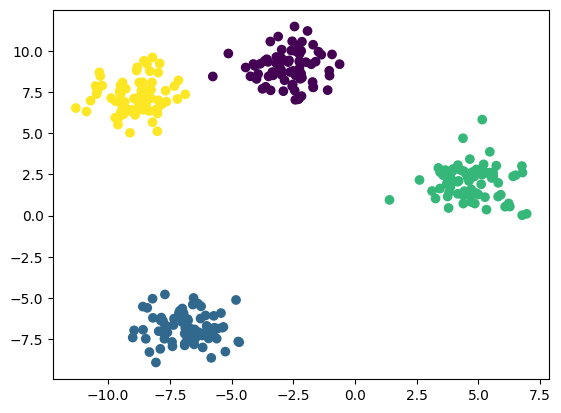

In [1]:
#21
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()



In [2]:
#22
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X, _ = load_iris(return_X_y=True)
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)
print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


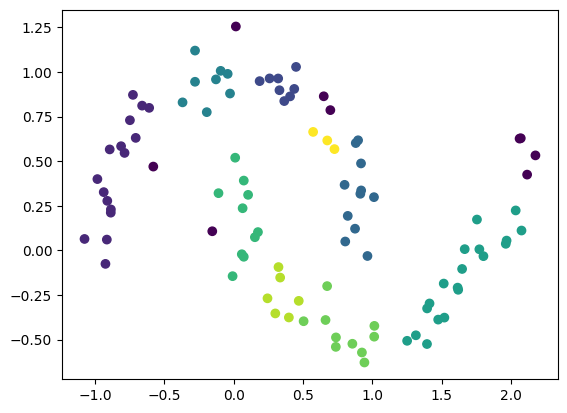

In [3]:
#23
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(noise=0.1)
labels = DBSCAN(eps=0.2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [4]:
#24
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

X, _ = load_wine(return_X_y=True)
X = StandardScaler().fit_transform(X)
labels = KMeans(n_clusters=3).fit_predict(X)

import numpy as np
print(np.bincount(labels))


[51 65 62]


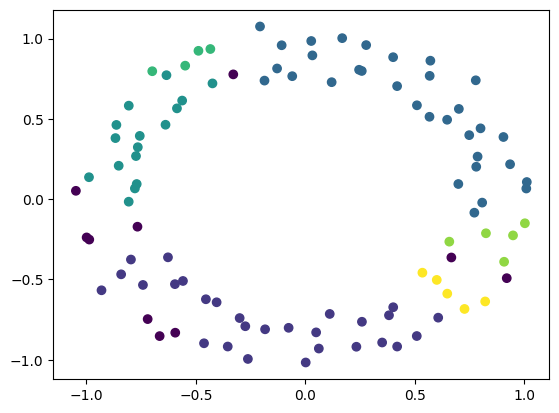

In [5]:
#25
from sklearn.datasets import make_circles

X, _ = make_circles(noise=0.05)
labels = DBSCAN(eps=0.2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [6]:
#26
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

X, _ = load_breast_cancer(return_X_y=True)
X = MinMaxScaler().fit_transform(X)

model = KMeans(n_clusters=2)
model.fit(X)
print(model.cluster_centers_)


[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


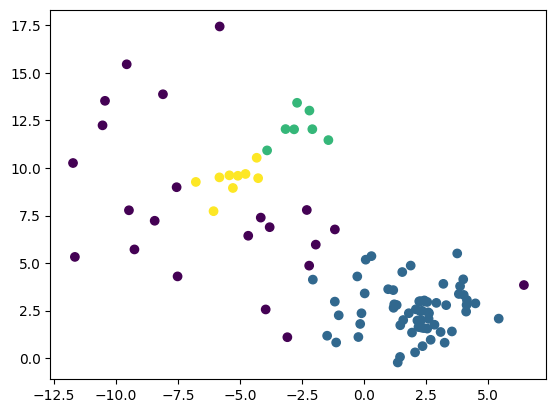

In [7]:
#27
X, _ = make_blobs(cluster_std=[1,2,3])
labels = DBSCAN(eps=1.5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


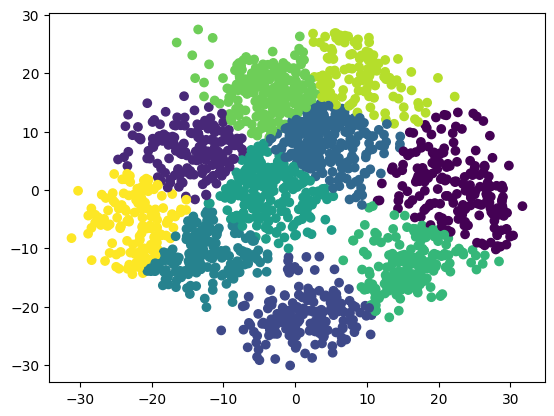

In [8]:
#28
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X, y = load_digits(return_X_y=True)
X = PCA(2).fit_transform(X)
labels = KMeans(10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


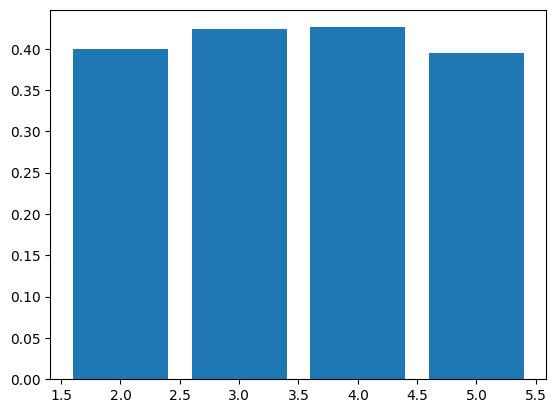

In [9]:
#29
from sklearn.metrics import silhouette_score

scores = []
for k in range(2,6):
    labels = KMeans(k).fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(range(2,6), scores)
plt.show()


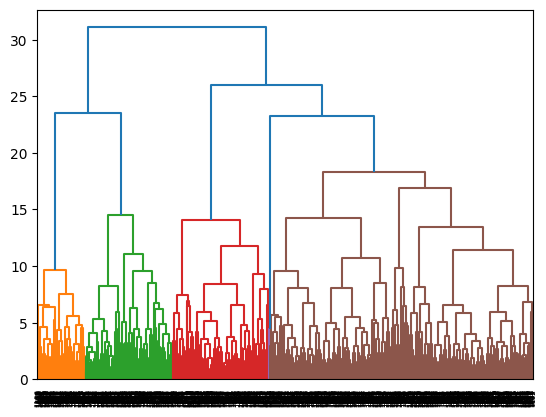

In [10]:
#30
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='average')
dendrogram(Z)
plt.show()


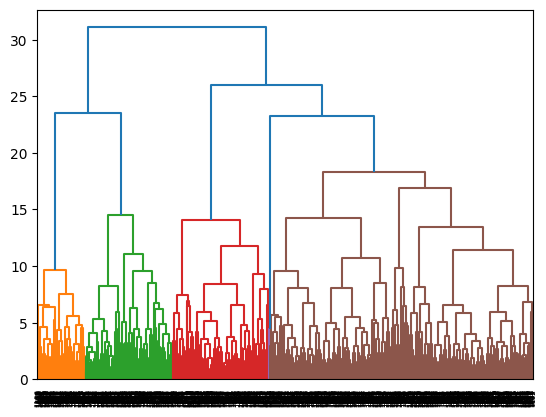

In [11]:
#31
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='average')
dendrogram(Z)
plt.show()


In [12]:
#31
from sklearn.metrics import silhouette_score

X, _ = make_blobs(centers=5)
labels = KMeans(5).fit_predict(X)
print(silhouette_score(X, labels))


0.6275124928761544


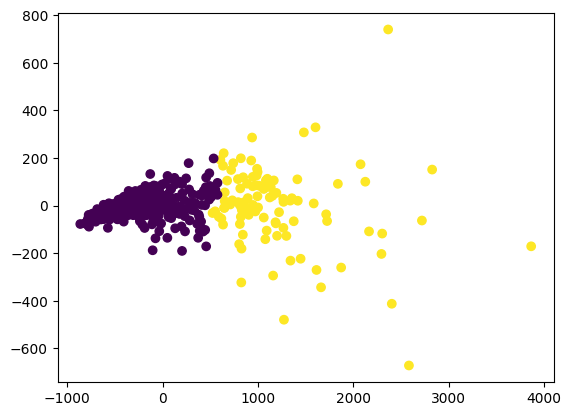

In [13]:
#32
X, y = load_breast_cancer(return_X_y=True)
X = PCA(2).fit_transform(X)
labels = AgglomerativeClustering(2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


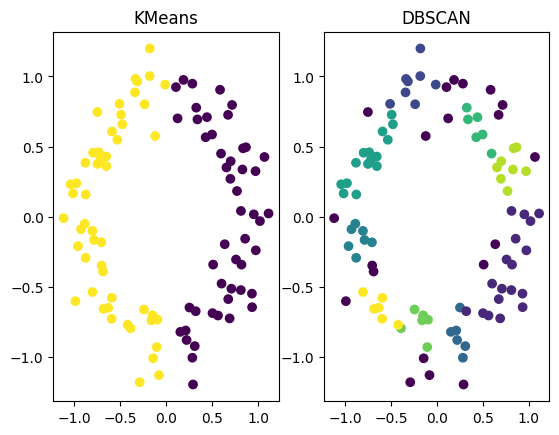

In [14]:
#33
X, _ = make_circles(noise=0.1)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=KMeans(2).fit_predict(X))
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=DBSCAN(eps=0.2).fit_predict(X))
plt.title("DBSCAN")

plt.show()


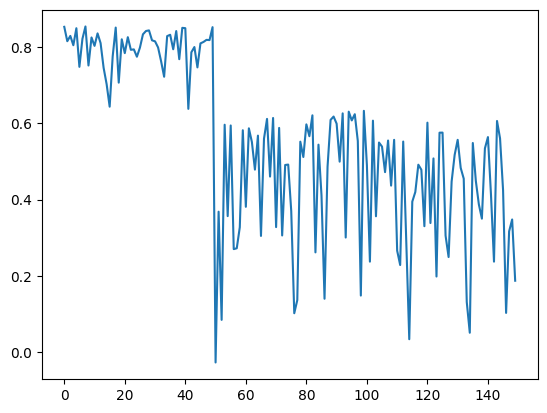

In [15]:
#34
from sklearn.metrics import silhouette_samples

X, _ = load_iris(return_X_y=True)
labels = KMeans(3).fit_predict(X)
scores = silhouette_samples(X, labels)

plt.plot(scores)
plt.show()


In [18]:
#35
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate noisy data
X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.5,
    random_state=42
)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count noise points (-1)
noise_points = list(labels).count(-1)

print("Noise points:", noise_points)




Noise points: 142


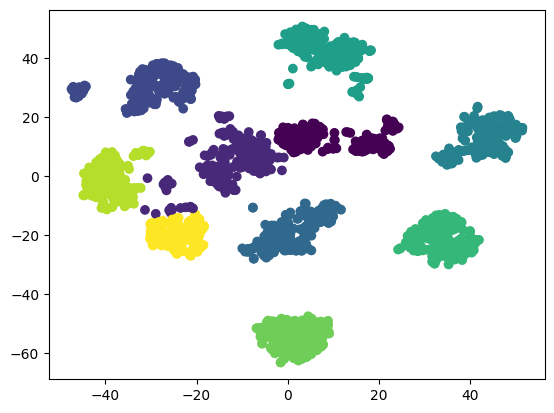

In [19]:
#36
from sklearn.manifold import TSNE

X, _ = load_digits(return_X_y=True)
X = TSNE(2).fit_transform(X)
labels = AgglomerativeClustering(10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


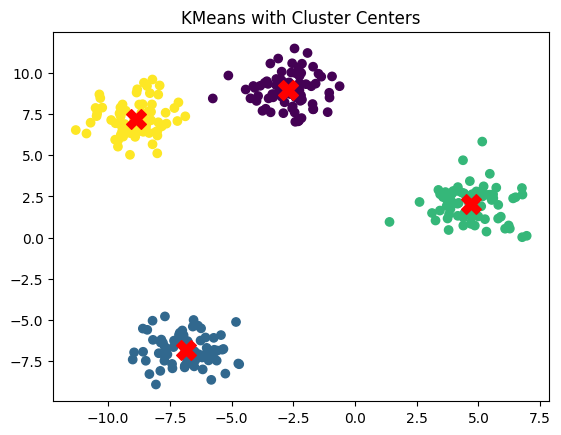

In [20]:
#36
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200
)
plt.title("KMeans with Cluster Centers")
plt.show()


In [21]:
#37
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

X, _ = load_iris(return_X_y=True)

dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

print("Noise samples:", list(labels).count(-1))


Noise samples: 2


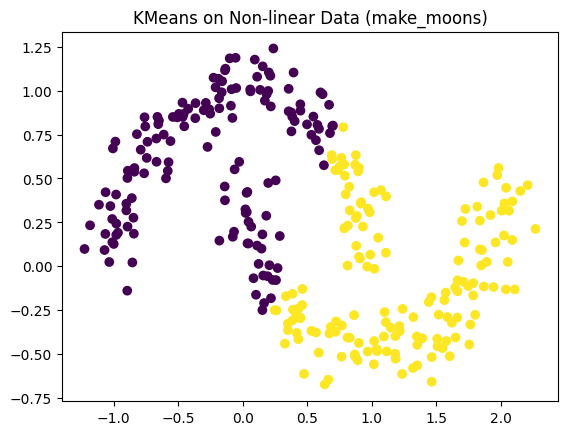

In [22]:
#38
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("KMeans on Non-linear Data (make_moons)")
plt.show()


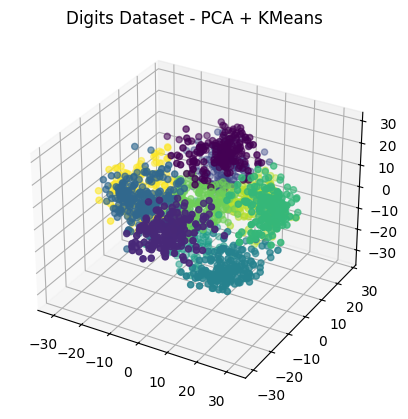

In [23]:
#39
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = load_digits(return_X_y=True)

X_pca = PCA(n_components=3).fit_transform(X)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
plt.title("Digits Dataset - PCA + KMeans")
plt.show()


In [24]:
#40
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
labels = KMeans(n_clusters=5, random_state=42).fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.678738720085253


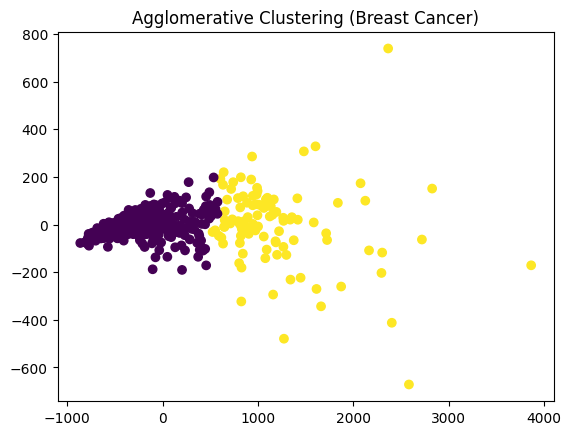

In [25]:
#41
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = load_breast_cancer(return_X_y=True)

X_pca = PCA(n_components=2).fit_transform(X)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering (Breast Cancer)")
plt.show()


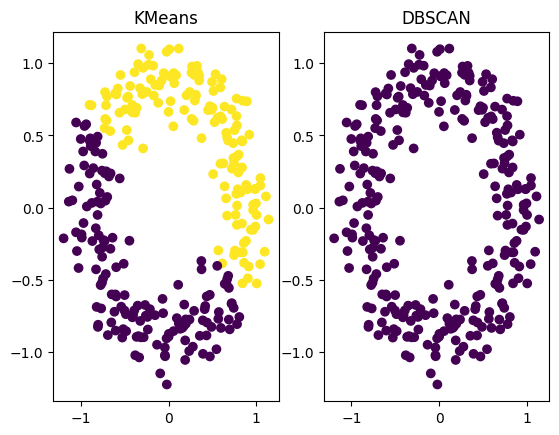

In [26]:
#42
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.1, random_state=42)

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=KMeans(n_clusters=2).fit_predict(X))
plt.title("KMeans")

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=DBSCAN(eps=0.2).fit_predict(X))
plt.title("DBSCAN")

plt.show()


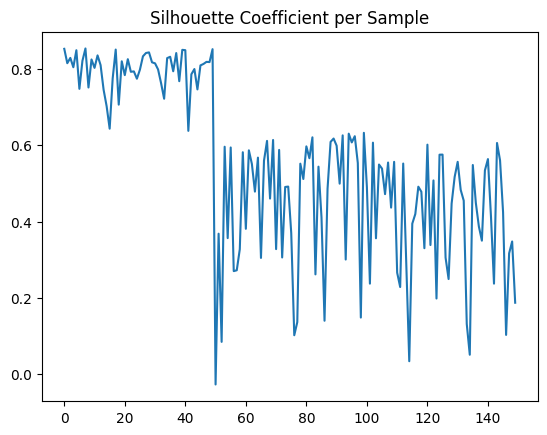

In [27]:
#43
from sklearn.metrics import silhouette_samples

X, _ = load_iris(return_X_y=True)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

sample_scores = silhouette_samples(X, labels)

plt.plot(sample_scores)
plt.title("Silhouette Coefficient per Sample")
plt.show()


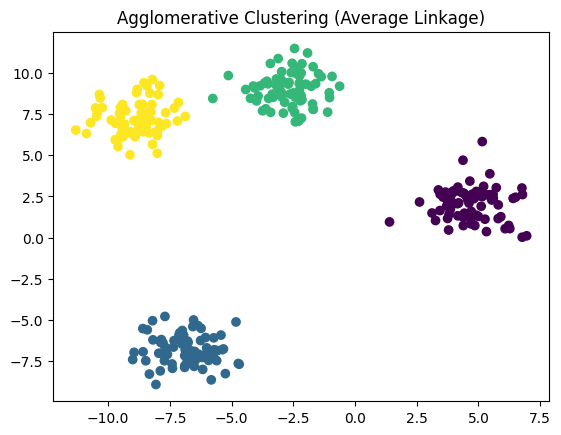

In [28]:
#44
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

labels = AgglomerativeClustering(
    n_clusters=4,
    linkage='average'
).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


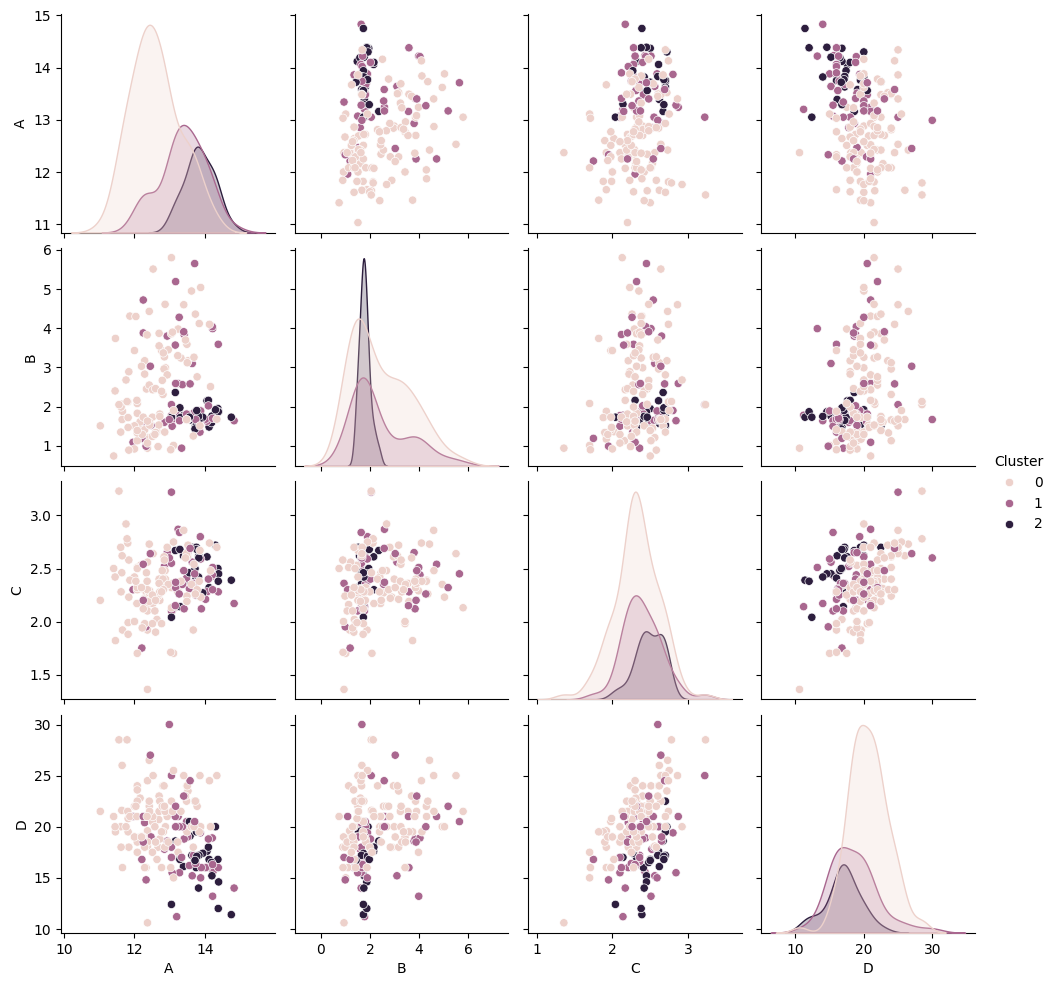

In [29]:
#45
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine

X, _ = load_wine(return_X_y=True)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

df = pd.DataFrame(X[:, :4], columns=["A", "B", "C", "D"])
df["Cluster"] = labels

sns.pairplot(df, hue="Cluster")
plt.show()


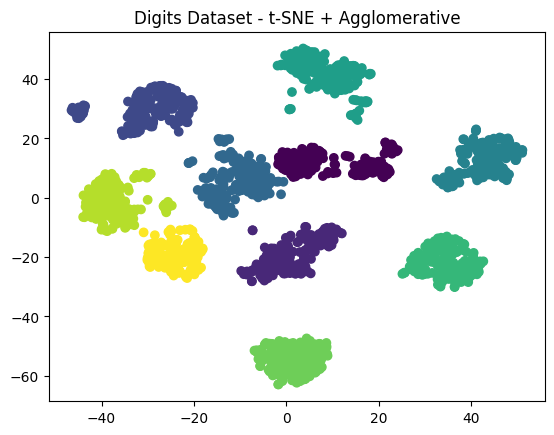

In [30]:
#46
from sklearn.manifold import TSNE

X, _ = load_digits(return_X_y=True)

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
labels = AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title("Digits Dataset - t-SNE + Agglomerative")
plt.show()


Number of noise points: 138


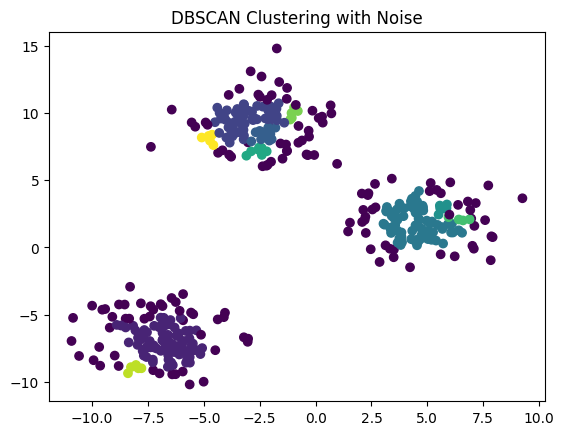

In [31]:
#47
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate noisy blob data
X, _ = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=1.5,
    random_state=42
)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count noise points
noise_count = list(labels).count(-1)
print("Number of noise points:", noise_count)

# Visualize clusters and noise
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN Clustering with Noise")
plt.show()


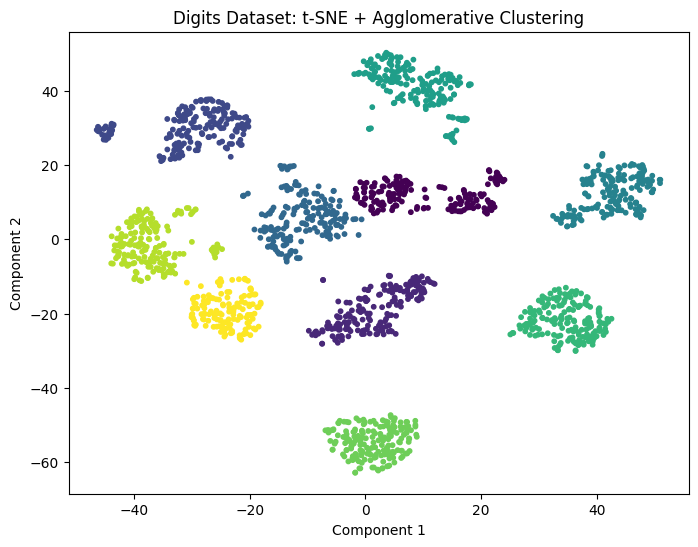

In [33]:
#48
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Digits dataset
X, y = load_digits(return_X_y=True)

# Apply t-SNE with safe parameters
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    init='pca',
    learning_rate='auto'
)

X_reduced = tsne.fit_transform(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X_reduced)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=10)
plt.title("Digits Dataset: t-SNE + Agglomerative Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

